In [1]:
import numpy as np

In [13]:
def pca(X=np.array([]), no_dims=50):
    print('Preprocessing the data using PCA')
    n, d = X.shape
    Mean = np.tile(np.mean(X, 0), (n, 1))
    X = X - Mean
    l, M = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 64)


In [14]:
projected[0]

array([-1.25946645e+00,  2.12748835e+01, -9.46305462e+00,  1.30141887e+01,
       -7.12882278e+00, -7.44065876e+00,  3.25283716e+00,  2.55347036e+00,
       -5.81842142e-01,  3.62569695e+00,  2.58595688e+00,  1.55160708e+00,
        8.54496709e-01, -3.33874935e+00,  5.90658968e+00,  2.74359339e+00,
        4.19836907e-01, -8.98149693e-01,  7.02610866e-01, -3.46211868e+00,
        2.68084958e+00,  1.00944951e+00,  2.00970276e+00,  1.29531479e+00,
        1.17887873e+00,  2.30058185e+00,  3.67072108e+00, -9.43668900e-01,
       -1.13250195e+00,  2.35979550e+00, -1.81738593e+00, -7.55016284e-01,
        1.62841809e-01, -2.11297739e+00,  1.09482318e+00,  1.95685532e-01,
       -8.99936129e-02, -2.76374068e+00,  1.08888322e+00,  2.06004009e-01,
        1.70451133e+00,  5.81318379e-01,  7.12698392e-01, -1.88038868e-01,
        6.28313404e-01, -5.94986903e-01,  4.76923307e-02, -7.13294070e-01,
       -3.39315207e-01,  4.30994090e-02, -4.21401144e-01, -1.21887592e-01,
       -6.33281370e-02, -

In [15]:
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

In [16]:
np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=0.5)

Text(0, 0.5, '$x_2$')

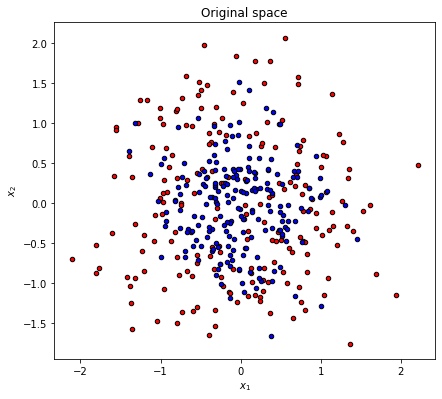

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1, aspect='equal')
plt.title('Original space')
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c='red', s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue', s=20, edgecolor='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '2nd component')

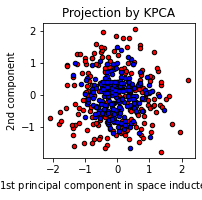

In [20]:
kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X[reds, 0], X[reds, 1], c='red', s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c='blue', s=20, edgecolor='k')
plt.title('Projection by KPCA')
plt.xlabel(r'1st principal component in space inducted by $\phi$')
plt.ylabel('2nd component')

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis